# Explore here

In [4]:
import pandas as pd

df = pd.read_csv('/workspaces/machine-learning-python-template/data/raw/data.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


df.info()

In [6]:
df.shape

(48895, 16)

In [7]:
repeatedhouses = df["id"].duplicated().sum()
print('Number of repeated houses is ' + str(repeatedhouses))
repeatedhosts = df['host_id'].duplicated().sum()
print('Number of repeated hosts is ' + str(repeatedhosts))


Number of repeated houses is 0
Number of repeated hosts is 11438


There are no repeated houses, tbut there are 11438 hosts that own at least two houses

In [8]:
drops = ['id', 'host_id', 'name', 'host_name', 'neighbourhood', 'last_review']
df = df.drop(drops, axis=1)
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


Because no houses are repeated, we can drop the id, the name of the ad is not relevant and the name of the house neither. 

Univariate Categorical analysis:

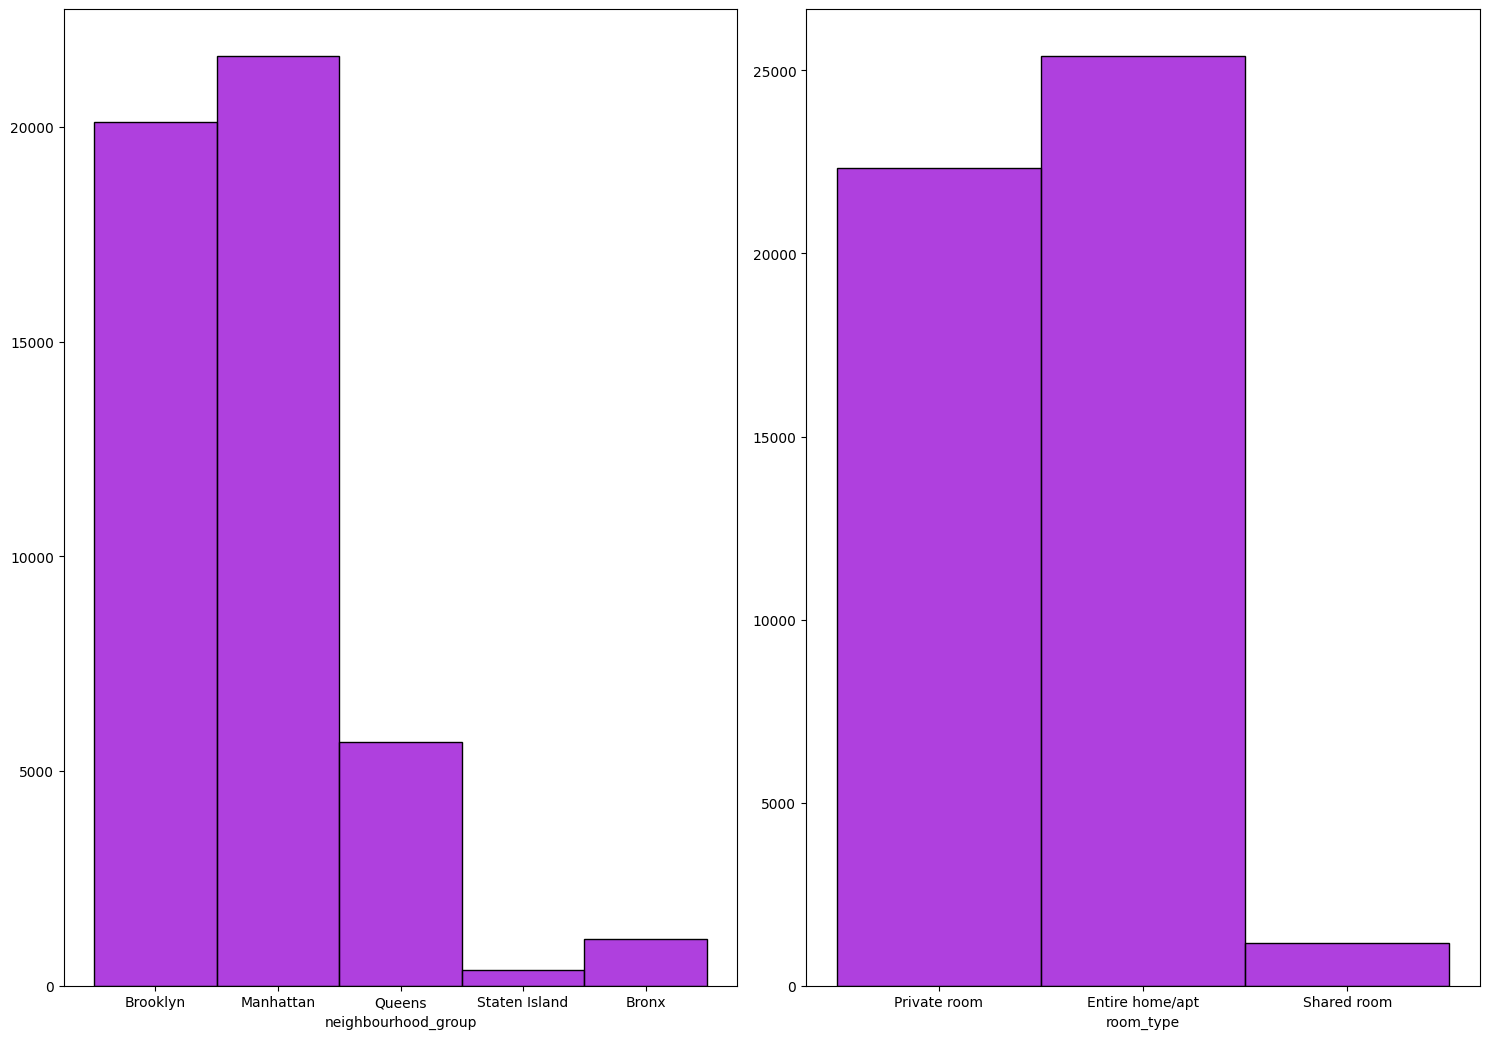

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 2, figsize = (15, 10.5))


cols = ['neighbourhood_group', 'room_type']

for col, ax in zip(cols, axis.ravel()): 
    sns.histplot(ax = ax, data = df, x = col, color = 'darkviolet').set(ylabel = None)



plt.tight_layout()


plt.show()

The neighbourhood groups where there are more houses for rent is Manhattan, and the one with the less is Staten Island.  The most common room type is the entire home, followed closely by the private room. 


Univariate Numerical analysis:

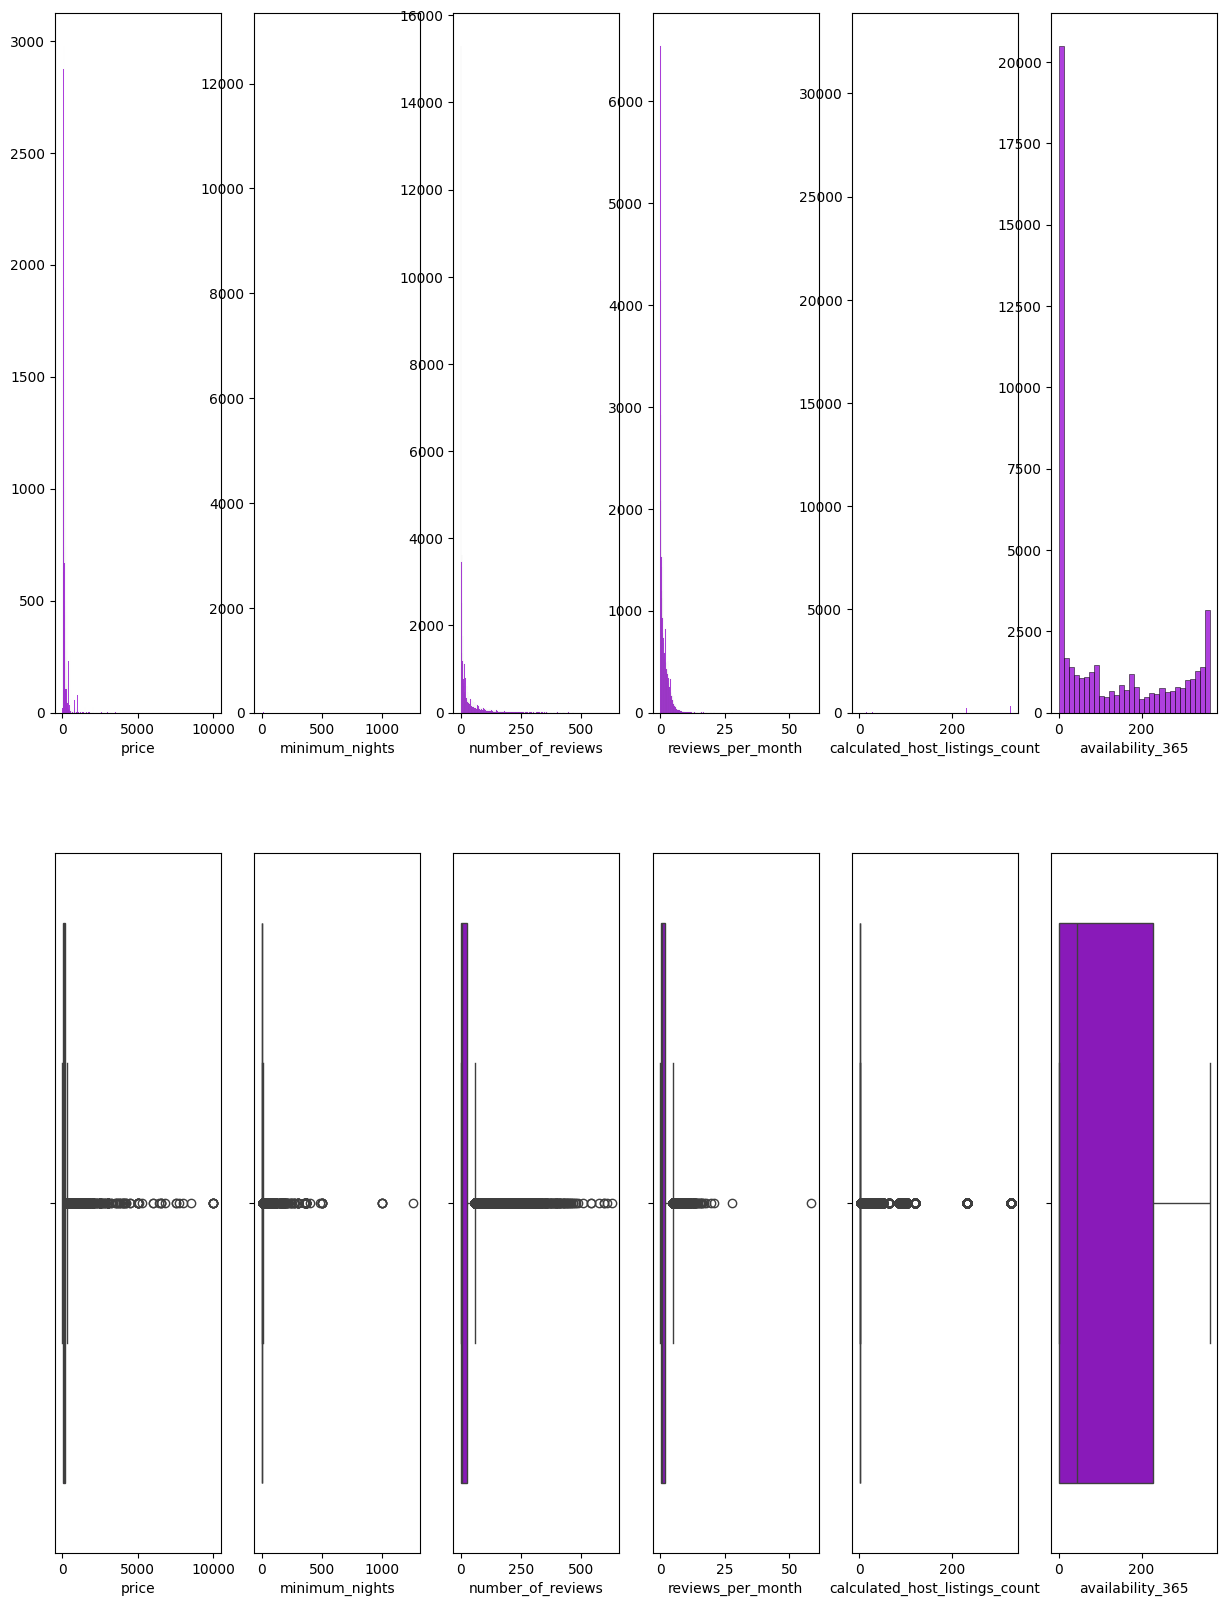

In [10]:
fig, axis = plt.subplots(2, 6, figsize = (15, 20))

cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

for i, col in enumerate(cols):
    sns.histplot(ax=axis[0, i], data=df, x=col, color='darkviolet').set(ylabel=None)
    sns.boxplot(ax=axis[1, i], data=df, x=col, color='darkviolet')



plt.show()

No voy a comentar, no se ve nada :)


Multivariate numerical-numerical analysis:

I am going to compare the price to different numerical variables

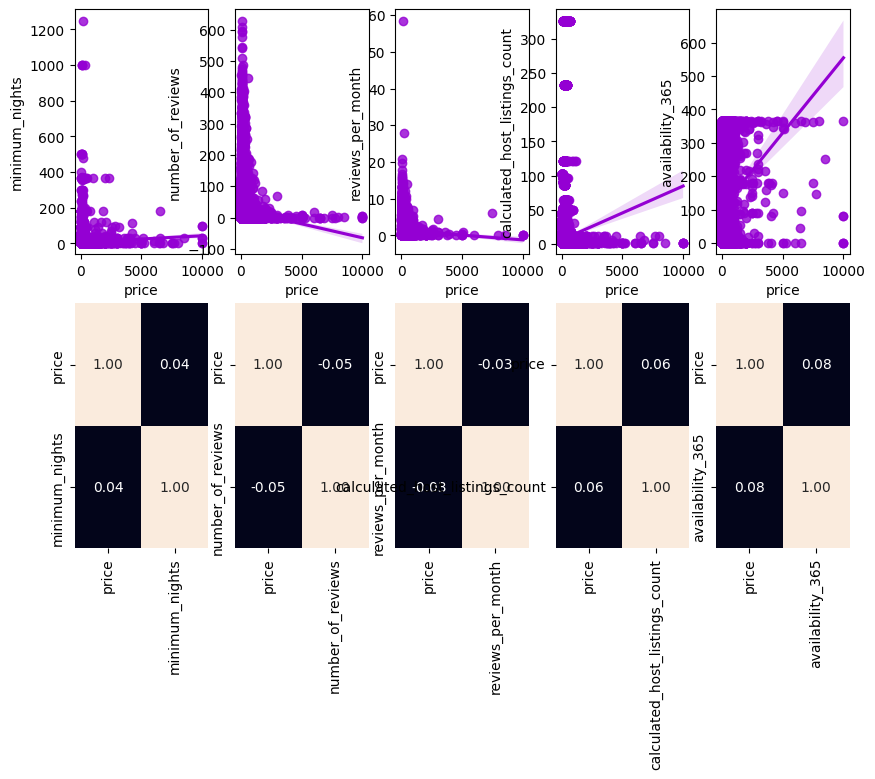

In [11]:
fig, axis = plt.subplots(2, 5, figsize = (10, 7))

x_data = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

for i, col in enumerate(x_data):
    sns.regplot(ax = axis[0, i], data = df, x = "price", y = col, color = 'darkviolet')
    sns.heatmap(df[["price", col]].corr(), annot = True, fmt = ".2f", ax = axis[1, i], cbar = False)





plt.show()

Out of the 5 variablies studied in this step, only three of them (minimum nights, host listings count and 365 availability) have a positive relationship with the price, whereas the other two have a negative relationship.

Nevertheless, all of them are very close to 0, meaning that the relationship is very weak to even be considered. 

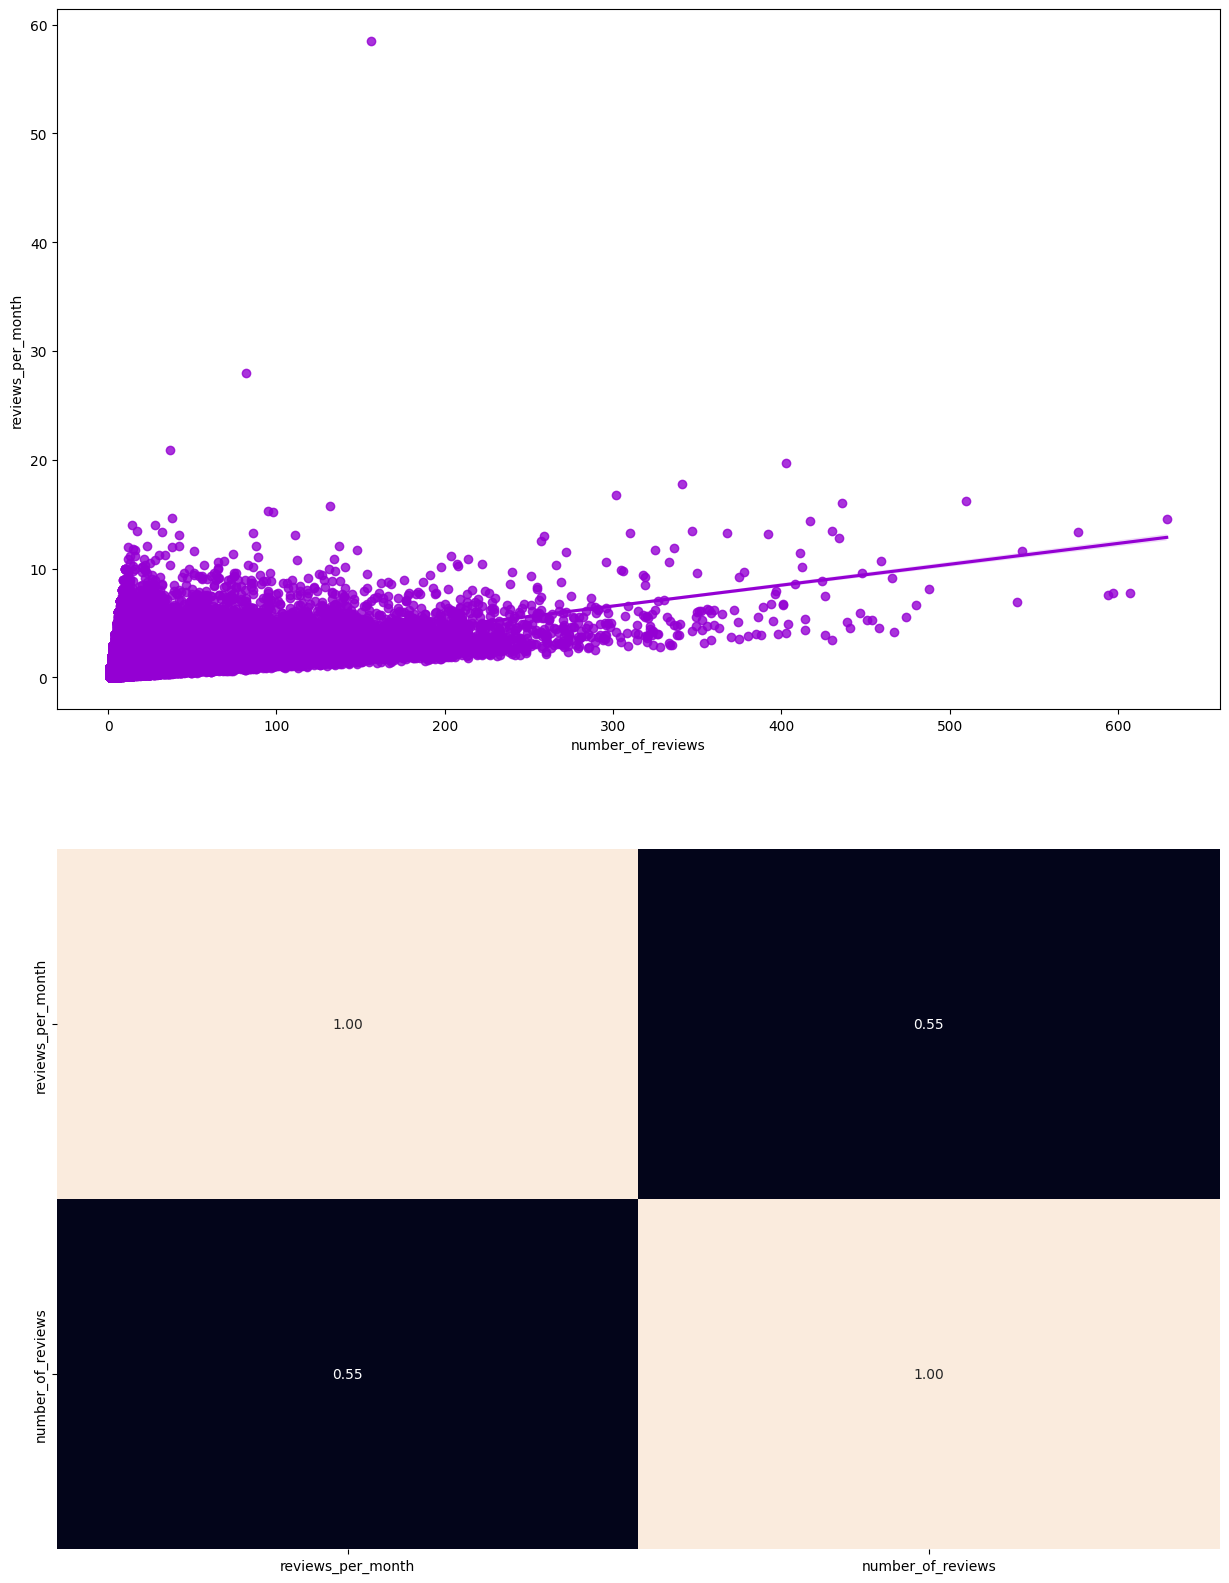

In [12]:

fig, axis = plt.subplots(2, 1, figsize = (15, 20))

sns.regplot(ax = axis[0], data = df, x = "number_of_reviews", y = 'reviews_per_month', color = 'darkviolet')
sns.heatmap(df[["reviews_per_month", 'number_of_reviews']].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)


plt.show()

We can see here that there is a good positive relationship between the number of reviews a post has an the number of reviews it receives per month. This is kind of expected, as the higher the number of reviews, the more likely it is that those reviews will be spread accross different months. However, we can see an outlier at reviews per month = 60. This is quite strange, as no month has more than 30 nights, and each apartment/room needs to be booked for at least one hour, so it might be due to an error. 

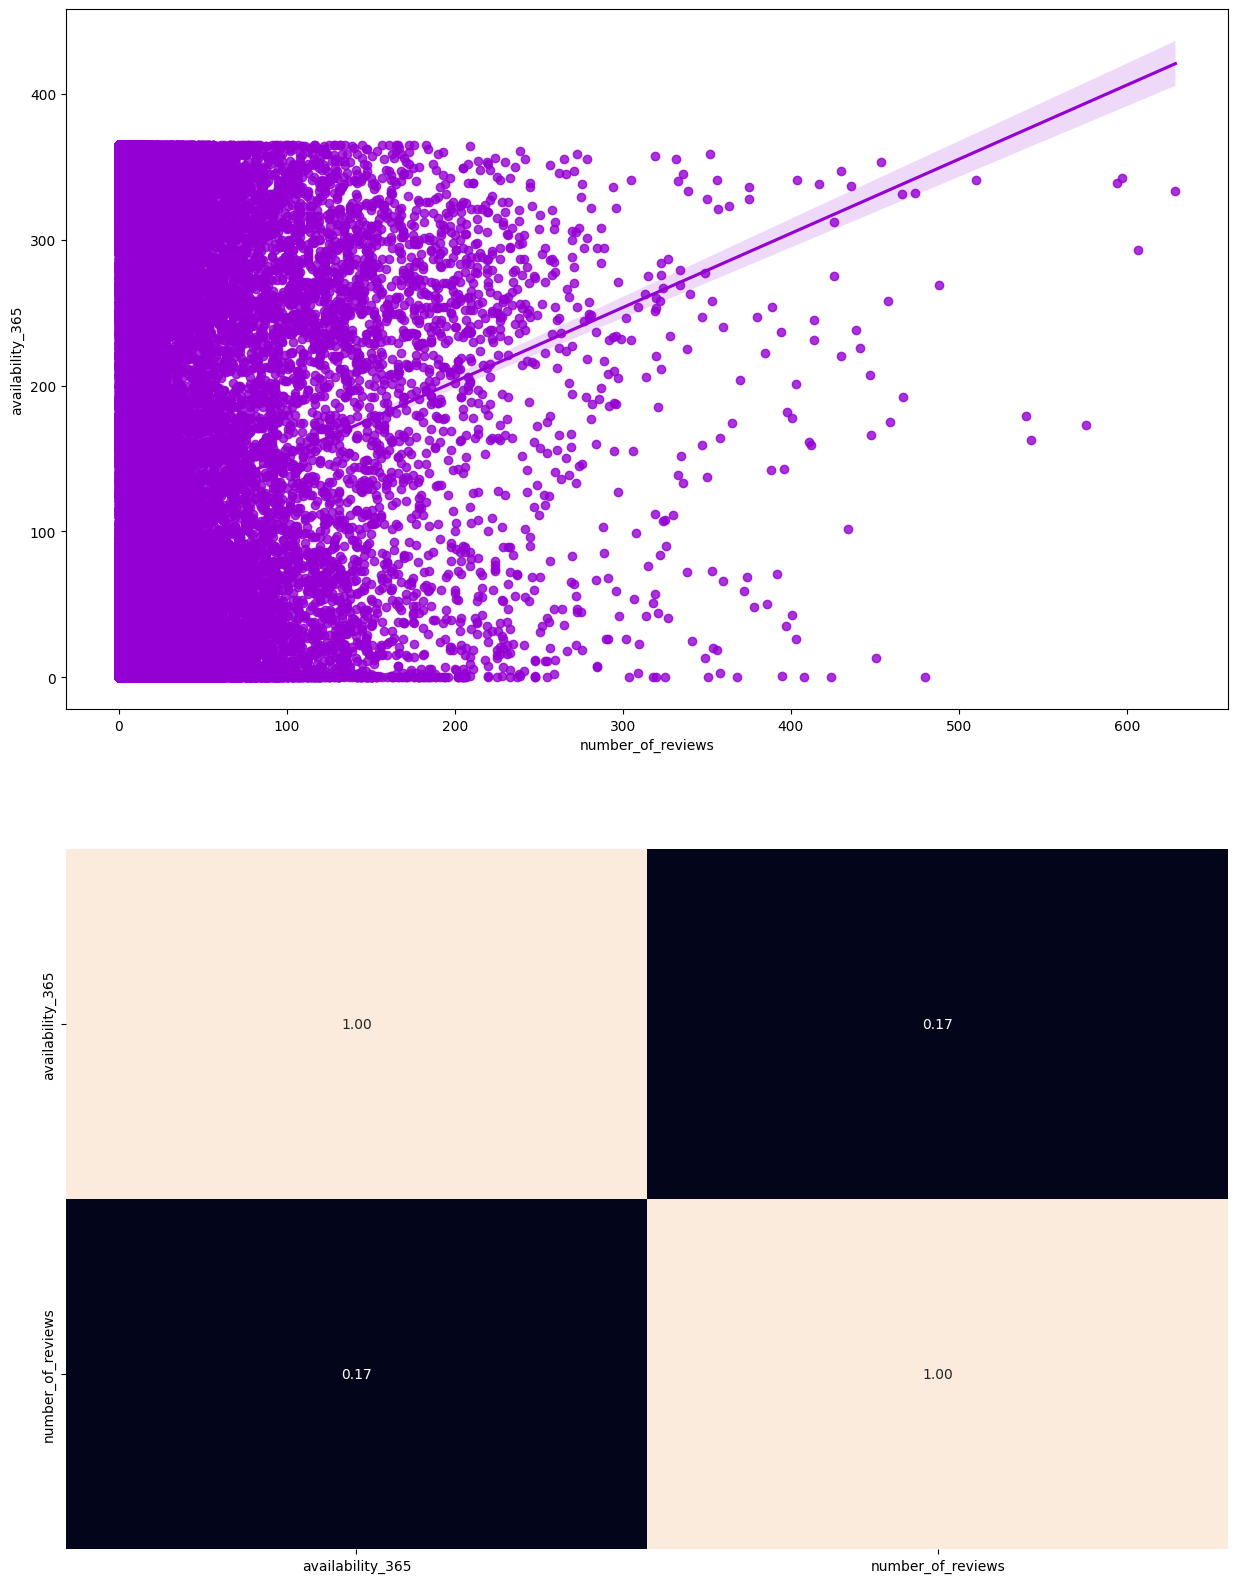

In [13]:
fig, axis = plt.subplots(2, 1, figsize = (15, 20))

sns.regplot(ax = axis[0], data = df, x = "number_of_reviews", y = 'availability_365', color = 'darkviolet')
sns.heatmap(df[["availability_365", 'number_of_reviews']].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)


plt.show()

There is a positive, slightly weak, linear relationship between the number of reviews and the 365 availability. Probabily because the more days the apartment/room is available, the more chances of being booked often and therefore the more chances of getting reviews. 

import folium
import statistics as stats
import branca.colormap as cm

latmedian = stats.median(df['latitude'])
lonmedian = stats.median(df['longitude'])

colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow'], vmin=min(df['price']), vmax=max(df['price']))

m = folium.Map(location=[latmedian, lonmedian], zoom_start=10)

for i in range(len(df)):
    folium.Circle(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        radius=10,
        fill=True,
        color=colormap(df.iloc[i]['price']),
        fill_opacity=0.2
    ).add_to(m)

m.add_child(colormap)

m

We can see here that the maximum price is 10,000 dollars. However, this is not representative of most prices. Therefore, we are going to establish a different maximum for better visualisation.

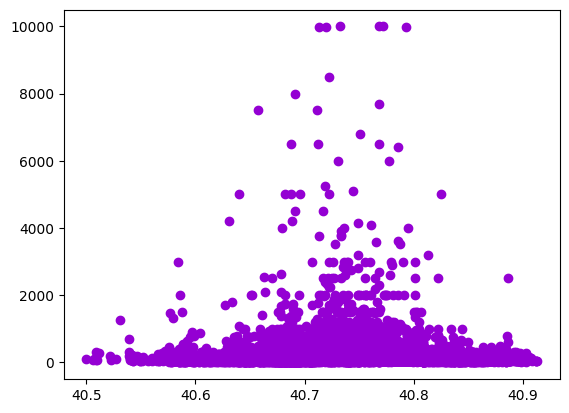

In [15]:
plt.scatter(x= df['latitude'], y = df['price'], color = 'darkviolet')
plt.show()

The number of airbnbs that have a price higher than 2000 per night is very small compared to the amount of airbnbs being considered. Because most of the prices seem to be under 1000 a night, we will repeat the map using a maximum of 500, so that the gradient looks better. 

df2 = df[df['price']< 500]

latmedian = stats.median(df['latitude'])
lonmedian = stats.median(df['longitude'])

colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow'], vmin=0, vmax=500)

m = folium.Map(location=[latmedian, lonmedian], zoom_start=10)

for i in range(len(df2)):
    folium.Circle(
        location=[df2.iloc[i]['latitude'], df2.iloc[i]['longitude']],
        radius=10,
        fill=True,
        color=colormap(df2.iloc[i]['price']),
        fill_opacity=0.2
    ).add_to(m)

m.add_child(colormap)

m

As expected, the most expensive airbnbs are in Manhattan, which is followed by Brooklyn and Queens.

df3 = df[df['price']>500]


colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow'], vmin=500, vmax=10000)

m = folium.Map(location=[latmedian, lonmedian], zoom_start=10)

for i in range(len(df3)):
    folium.Circle(
        location=[df3.iloc[i]['latitude'], df3.iloc[i]['longitude']],
        radius=10,
        fill=True,
        color=colormap(df3.iloc[i]['price']),
        fill_opacity=0.2
    ).add_to(m)

m.add_child(colormap)

m

This map shows the most expensive airbnbs.

Multivariate categorical-categorical analysis:

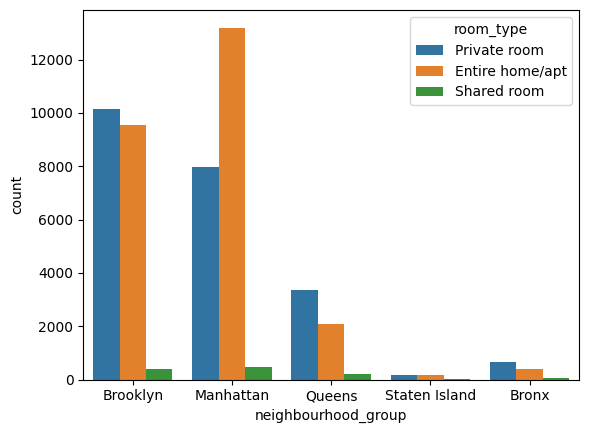

In [20]:

sns.countplot( data = df, x = "neighbourhood_group", hue = "room_type")
plt.show()


In the graph above, we can see the number of airbnbs per naighbourhood group and room type.

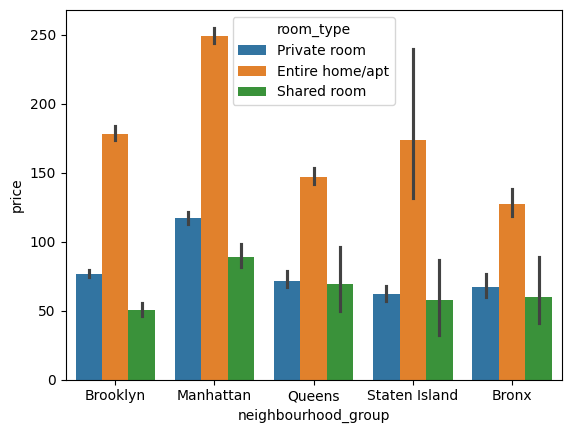

In [21]:
sns.barplot(data = df, x = "neighbourhood_group", y = "price", hue = "room_type")


plt.show()

The graph above shows that the price is, as expected, higher for entire apartments. However, regardless of the type of room, Manhattan is still the most expensive neighbourhood. 

In [22]:

df["neigh_n"] = pd.factorize(df["neighbourhood_group"])[0]
df["room_n"] = pd.factorize(df["room_type"])[0]


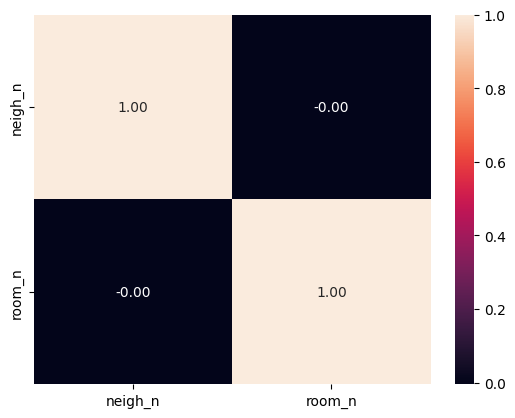

In [23]:
sns.heatmap(df[["neigh_n", "room_n"]].corr(), annot = True, fmt = ".2f")

plt.show()

As expected, there is no relationship between the type of room and the neighbourhood group. 

Multivariate Numerical-categorical analysis

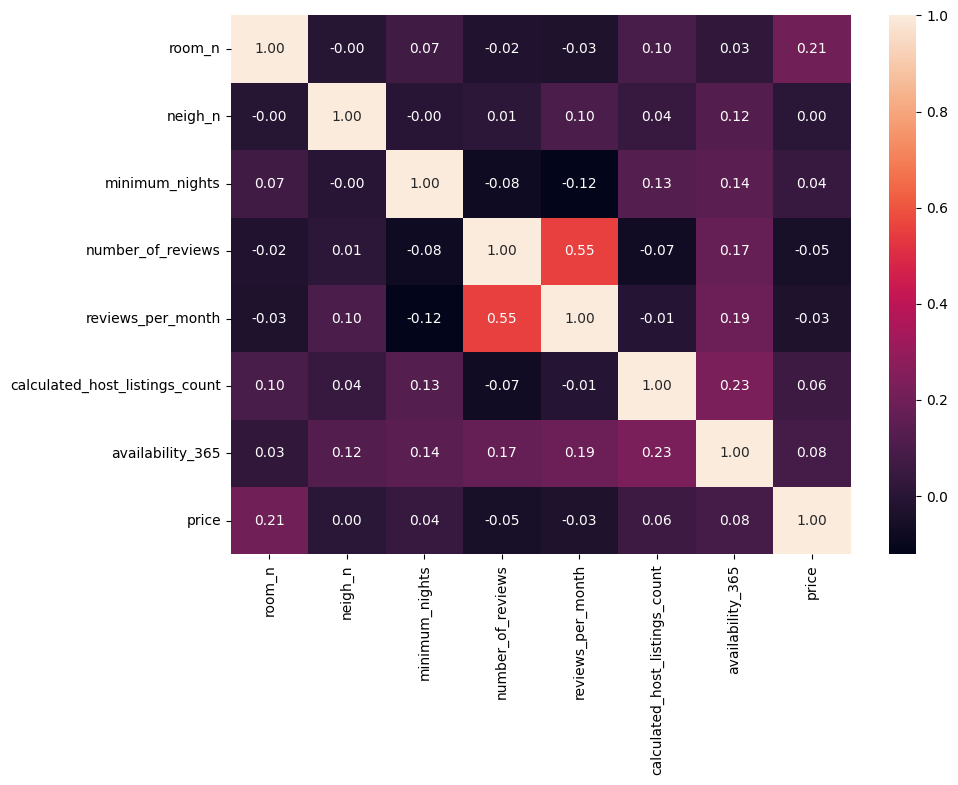

In [24]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(df[["room_n", "neigh_n", 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price']].corr(), annot = True, fmt = ".2f")


plt.show()

sns.pairplot(data = df)

DAY 2:

In [26]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neigh_n,room_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.786911,0.567113
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.844386,0.541249
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,1.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,1.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,4.000000,2.000000


import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize = (15, 10))
sns.boxplot(ax = axis[0, 0], data = df, y = "room_n")
sns.boxplot(ax = axis[0, 1], data = df, y = "neigh_n")
sns.boxplot(ax = axis[0, 2], data = df, y = "minimum_nights")
sns.boxplot(ax = axis[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 1], data = df, y = "reviews_per_month")
sns.boxplot(ax = axis[1, 2], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 0], data = df, y = "availability_365")
sns.boxplot(ax = axis[2, 1], data = df, y = "price")

plt.tight_layout()

plt.show()

We can see that the variables most affected by the outliers are the following: minimum nights, number of reviews, reviews per month, calculated host listing counts and price. 

In [ ]:
price_stats = df["price"].describe()
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")